# **Implémentation d'un RNN avec Keras** - [voir l'article](https://inside-machinelearning.com/les-reseaux-de-neurones-recurrents-rnn/)

## **Charger les données**

Pour **ce notebook**, nous allons utiliser le même **jeu de données** que dans [cet article](https://inside-machinelearning.com/un-modele-classification-binaire-en-nlp/).

Nous devons donc **entraîner notre modèle** sur des critiques de cinéma. Une fois que l'**apprentissage** sera réalisé, le modèle pourra **détecter** si une critique est **positive** ou **négative** !

Les critiques sont **déjà encodés** de telle sorte qu'**un même mot est représenté par un même chiffre** et donc une phrase par une suite de chiffre.

Par **exemple** :
"un chat attrape un oiseau" sera représenté par [1, 2, 3, 1, 4].



Les **critiques dans notre jeu de données** sont très longues et nous voulons que notre modèle apprenne vite. On **réduit** donc **le nombre de mots de chaque critique** pour prendre seulement les **1000 qui apparaissent le plus fréquemment !**

On **charge ces critiques** avec la fonction *imdb.load_data()* en précisant que nous voulons **au maximum 1000 mots**.

On aura par la suite :
- les **critiques** contenues dans *x_train* et *x_test*
- le **sentiment** (1 pour 'positif' ou 0 pour 'négatif') de chaque critique contenus dans *y_train* et *y_test*

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences


## **Preprocessing**

Il y a une dernière étape **avant d'entraîner le modèle**, le **preprocessing**.

En fait, **dans ce modèle** nous allons utiliser une couche *Embedding* qui permet d'avoir une **représentation plus optimisée du texte**.

Cette couche *Embedding* prend en entrée des **tenseurs**, cela implique qu'il faut que **tous nos vecteurs** (qui représentent les critiques) aient **la même taille**.

Actuellement nous avons **plusieurs critiques de cinéma**. Certaines sont **courtes**, d'autres sont **longues**.

Nous allons donc **normaliser** **les vecteurs** qui représentent les critiques pour qu'ils aient tous **une taille de 500** :

- Pour les plus courts **on rajoute des 0** au début
- Pour les plus longs **on tronque le vecteur**

Heureusement, la **fonction de Keras** *sequence.pad_sequences()* permet de réaliser cela **simplement**.



In [2]:
maxlen = 500

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


## **Construire le modèle**

### **Couche d'Embedding**

Pour construire notre modèle, on commencer par **utiliser** la couche *Embedding*. Cette couche permet de **changer la représentation des données**.

Au lieu d'avoir **un entier pour chaque mot**, on aura **un nombre réel entre 0 et 1 pour chaque mot**. Plus les mots sont **similaires** plus les nombres réels seront **proches**.

Ainsi, les mot 'homme' et 'garçon' auront **une valeur très proche** car les deux mots ont **un sens très similaire**.

Par exemple:
- 'homme' donne 0.73
- 'garçon' donne 0.69
- 'fille' donne 0.39

En quelque sorte la couche *Embedding* **traduit en langage informatique** le sens, **le contexte des critiques**.

*Embedding* est une couche car c'est **un processus qui apprend**  durant le **Deep Learning**. À chaque **ajustement des poids**, la couche *Embedding* ajuste, elle aussi, ses poids et donc **ajuste sa représentation** des critiques de cinéma.

Plus le modèle apprend, plus **la représentation sera précise**.

Cette couche appliquant un **changement essentiel** pour nos données, elle sera toujours utilisée comme **première couche** d'un modèle.

In [3]:
from keras.models import Sequential
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(max_features, 32, input_length = maxlen))

### **Couche RNN Simple**

Enfin, on utilise la couche *SimpleRNN* qui est la **couche basique** pour faire du **RNN avec Keras** !

*SimpleRNN* prend en entrée le **résultat** de la couche *Embedding*.

On y inque la **dimension du vecteur de sortie**, ici **32**.

In [4]:
from keras.layers import SimpleRNN

model.add(SimpleRNN(32))

Pour la **couche de prédiction** on utilise *Dense* avec la fonction **sigmoïd** pour **fonction d'activation** comme expliqué [dans cet article](https://https://inside-machinelearning.com/fonction-dactivation-comment-ca-marche-une-explication-simple/).

In [5]:
from keras.layers import Dense

model.add(Dense(1, activation='sigmoid'))

On peut finalement voir le **schèma du modèle RNN** pour avoir une **meilleure représentation** de ce qu'on vient de **construire**.

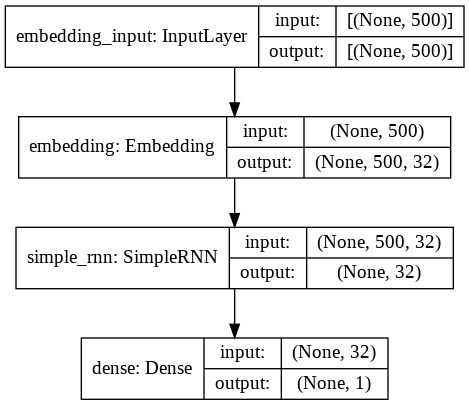

In [6]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Informations supplémentaire :**

N'hésitez pas à **changer les dimensions du vecteur de sortie** de la couche *SimpleRNN* ou même à **ajouter d'autres couches** *SimpleRNN* car n'oubliez pas... le **Machine Learning** c'est avant tout **de la pratique et des tests personnels !** ;)

Lorsqu'on ajoute des couches *SimpleRNN* il faut **insérer le paramètre** *return_sequences = True* dans les couches *SimpleRNN* supérieurs, comme suit :
```
model = Sequential()
model.add(Embedding(max_features, 32, input_length = maxlen))
model.add(SimpleRNN(64, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
```

## **Entraîner le modèle**

Pour entraîner le modèle il faut **configurer son apprentissage** en déterminant :
- l'**optimisateur**
- la **loss function**
- la **métrique** pour l'évaluer

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

On **entraîne le modèle** avec la fonction *fit()*.

On utilise un **paramètre** que nous n'avons pas vu précédement : *validation_split*.

Ce paramètre permet de **prendre des données de validation** directement depuis les **données d'entraînement**.

Ici, **20% des données d'entraînement** seront donc utilisées, non pas pour l'entrainement.. mais **pour la validation**.

In [8]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 52s 322ms/step - loss: 0.6702 - acc: 0.5629 - val_loss: 0.4925 - val_acc: 0.7792
Epoch 2/10
157/157 [==============================] - 49s 314ms/step - loss: 0.4822 - acc: 0.7831 - val_loss: 0.8451 - val_acc: 0.6146
Epoch 3/10
157/157 [==============================] - 49s 314ms/step - loss: 0.4494 - acc: 0.8013 - val_loss: 0.6872 - val_acc: 0.6846
Epoch 4/10
157/157 [==============================] - 49s 311ms/step - loss: 0.4055 - acc: 0.8241 - val_loss: 0.4240 - val_acc: 0.8254
Epoch 5/10
157/157 [==============================] - 49s 313ms/step - loss: 0.3634 - acc: 0.8507 - val_loss: 0.4469 - val_acc: 0.7938
Epoch 6/10
157/157 [==============================] - 50s 316ms/step - loss: 0.3495 - acc: 0.8572 - val_loss: 0.4354 - val_acc: 0.8240
Epoch 7/10
157/157 [==============================] - 50s 316ms/step - loss: 0.3305 - acc: 0.8644 - val_loss: 0.4042 - val_acc: 0.8312
Epoch 8/10
157/157 [==============================] - 4

## **Évaluer le modèle**

La dernière étape est l'**évaluation des performances** du modèle.

On **compare** la **précision** qu'il a sur les **données d'entraînement** avec celle qu'il a eu sur les **données de validation**. Puis, on fait la même chose avec **son erreur**, sa perte.

Si l'**écart est trop grand** le modèle est en **overfitting**, il faudra alors le réajuster.

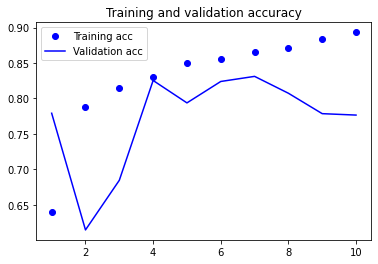

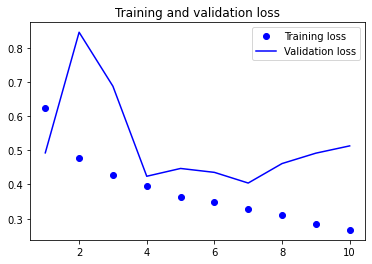

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Si les **performances** ne nous conviennent pas, on peut **ré-entrainer le modèle** avec **différents paramètres** ou en **ajoutant des couches**.

Sinon, on **évalue** notre modèle sur les **données de test** ! 

In [10]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 22s 28ms/step - loss: 0.5129 - acc: 0.7681


[0.5128501653671265, 0.7680799961090088]